# Computer Vision Object Detection

## Finds an object in a multi object frame using Flann feature matching

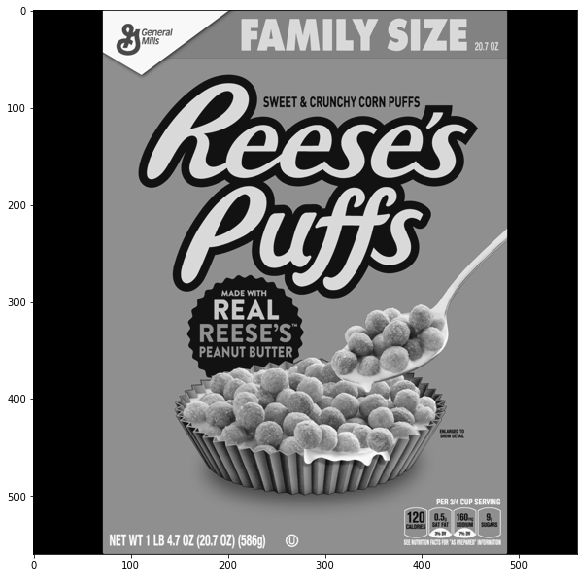

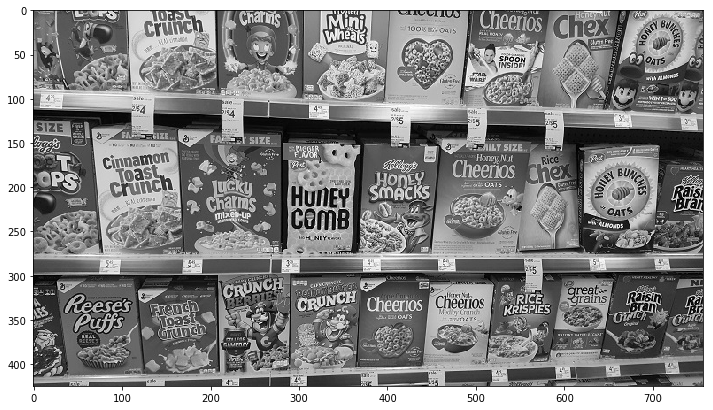

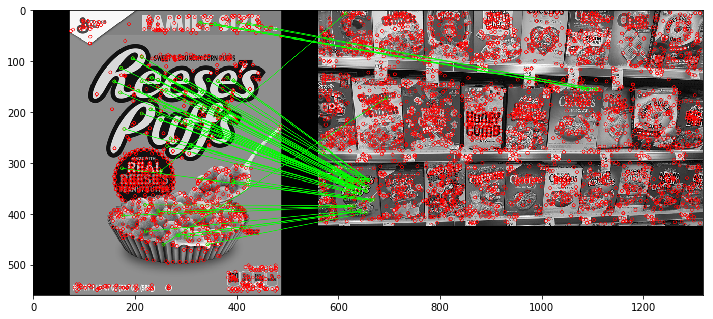

In [2]:
#imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#data
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')
reeses = cv2.imread('../Computer-Vision-with-Python/DATA/reeses_puffs.png',0)     
display(reeses)
cereals = cv2.imread('../Computer-Vision-with-Python/DATA/many_cereals.jpg',0) 
display(cereals)

#model
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)  
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

#results
matchesMask = [[0,0] for i in range(len(matches))]
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0), singlePointColor = (255,0,0),
                   matchesMask = matchesMask, flags = 0)
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)
display(flann_matches)